## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.120238  0.820376  0.755495 -0.396881 -1.313437 -1.030261
1 -0.225855 -1.097135 -0.361738 -0.302399 -0.109732 -1.159457
2  0.962210  0.654101 -0.643679 -0.977843  0.738544  0.388999
3 -0.494049 -0.944855  0.239229  0.292338 -1.750888 -1.240735
4 -0.971870  0.930830 -1.874000  1.267297 -0.622571  1.251524


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0143026	total: 46.5ms	remaining: 46.4s
1:	learn: 1.0033901	total: 46.9ms	remaining: 23.4s
2:	learn: 0.9930547	total: 47.2ms	remaining: 15.7s
3:	learn: 0.9813898	total: 47.4ms	remaining: 11.8s
4:	learn: 0.9714002	total: 47.8ms	remaining: 9.5s
5:	learn: 0.9604338	total: 48.2ms	remaining: 7.98s
6:	learn: 0.9499089	total: 48.6ms	remaining: 6.89s
7:	learn: 0.9386899	total: 48.9ms	remaining: 6.07s
8:	learn: 0.9288946	total: 49.3ms	remaining: 5.43s
9:	learn: 0.9183449	total: 49.7ms	remaining: 4.92s
10:	learn: 0.9075895	total: 50.2ms	remaining: 4.51s
11:	learn: 0.8964831	total: 50.5ms	remaining: 4.16s
12:	learn: 0.8862048	total: 50.9ms	remaining: 3.86s
13:	learn: 0.8779217	total: 51.2ms	remaining: 3.61s
14:	learn: 0.8699005	total: 51.6ms	remaining: 3.39s
15:	learn: 0.8603700	total: 52ms	remaining: 3.19s
16:	learn: 0.8510791	total: 52.3ms	remaining: 3.02s
17:	learn: 0.8419738	total: 52.6ms	remaining: 2.87s
18:	learn: 0.8322846	total: 53ms	remaining: 2.7

203:	learn: 0.1745325	total: 124ms	remaining: 482ms
204:	learn: 0.1729735	total: 124ms	remaining: 481ms
205:	learn: 0.1717793	total: 124ms	remaining: 480ms
206:	learn: 0.1705288	total: 125ms	remaining: 479ms
207:	learn: 0.1695220	total: 125ms	remaining: 478ms
208:	learn: 0.1685146	total: 126ms	remaining: 477ms
209:	learn: 0.1668767	total: 126ms	remaining: 475ms
210:	learn: 0.1654020	total: 127ms	remaining: 474ms
211:	learn: 0.1644264	total: 127ms	remaining: 473ms
212:	learn: 0.1629903	total: 127ms	remaining: 471ms
213:	learn: 0.1618345	total: 128ms	remaining: 470ms
214:	learn: 0.1605180	total: 128ms	remaining: 468ms
215:	learn: 0.1593772	total: 129ms	remaining: 467ms
216:	learn: 0.1583964	total: 129ms	remaining: 466ms
217:	learn: 0.1572715	total: 129ms	remaining: 464ms
218:	learn: 0.1562524	total: 130ms	remaining: 463ms
219:	learn: 0.1548391	total: 130ms	remaining: 462ms
220:	learn: 0.1533320	total: 131ms	remaining: 461ms
221:	learn: 0.1519604	total: 131ms	remaining: 459ms
222:	learn: 

469:	learn: 0.0360878	total: 230ms	remaining: 259ms
470:	learn: 0.0359093	total: 230ms	remaining: 259ms
471:	learn: 0.0357767	total: 231ms	remaining: 258ms
472:	learn: 0.0355857	total: 231ms	remaining: 257ms
473:	learn: 0.0354123	total: 231ms	remaining: 257ms
474:	learn: 0.0352265	total: 232ms	remaining: 256ms
475:	learn: 0.0350614	total: 232ms	remaining: 256ms
476:	learn: 0.0349815	total: 233ms	remaining: 255ms
477:	learn: 0.0348008	total: 233ms	remaining: 254ms
478:	learn: 0.0346427	total: 233ms	remaining: 254ms
479:	learn: 0.0345652	total: 234ms	remaining: 253ms
480:	learn: 0.0344881	total: 234ms	remaining: 253ms
481:	learn: 0.0342875	total: 235ms	remaining: 252ms
482:	learn: 0.0342117	total: 235ms	remaining: 252ms
483:	learn: 0.0340921	total: 235ms	remaining: 251ms
484:	learn: 0.0338968	total: 236ms	remaining: 250ms
485:	learn: 0.0338221	total: 236ms	remaining: 250ms
486:	learn: 0.0337484	total: 237ms	remaining: 249ms
487:	learn: 0.0335568	total: 237ms	remaining: 249ms
488:	learn: 

741:	learn: 0.0117335	total: 333ms	remaining: 116ms
742:	learn: 0.0116899	total: 334ms	remaining: 115ms
743:	learn: 0.0116371	total: 334ms	remaining: 115ms
744:	learn: 0.0115803	total: 335ms	remaining: 115ms
745:	learn: 0.0115438	total: 335ms	remaining: 114ms
746:	learn: 0.0115080	total: 335ms	remaining: 114ms
747:	learn: 0.0114481	total: 336ms	remaining: 113ms
748:	learn: 0.0113976	total: 336ms	remaining: 113ms
749:	learn: 0.0113338	total: 336ms	remaining: 112ms
750:	learn: 0.0112954	total: 337ms	remaining: 112ms
751:	learn: 0.0112541	total: 337ms	remaining: 111ms
752:	learn: 0.0111882	total: 338ms	remaining: 111ms
753:	learn: 0.0111399	total: 338ms	remaining: 110ms
754:	learn: 0.0111020	total: 338ms	remaining: 110ms
755:	learn: 0.0110372	total: 339ms	remaining: 109ms
756:	learn: 0.0109846	total: 339ms	remaining: 109ms
757:	learn: 0.0109329	total: 340ms	remaining: 108ms
758:	learn: 0.0108712	total: 340ms	remaining: 108ms
759:	learn: 0.0108346	total: 340ms	remaining: 107ms
760:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

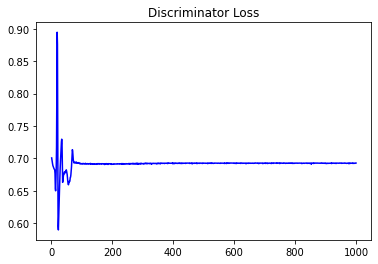

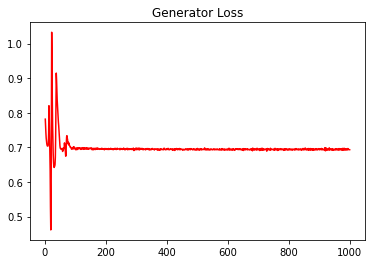

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.059678399460969776


#### Sanity Checks 

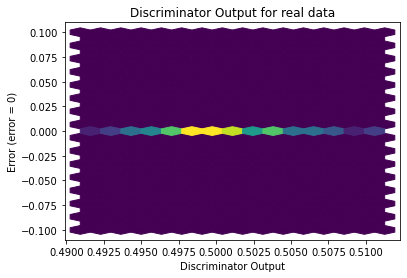

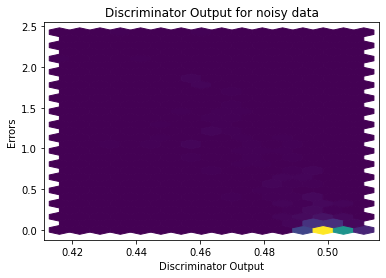

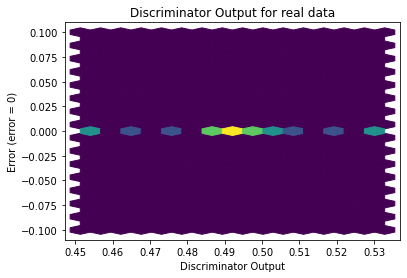

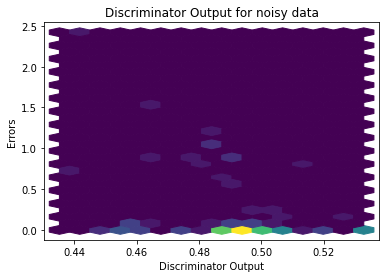

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


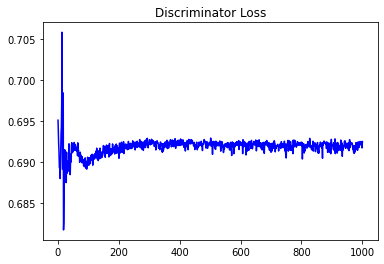

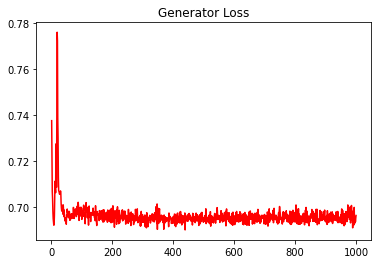

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.027031367851793654


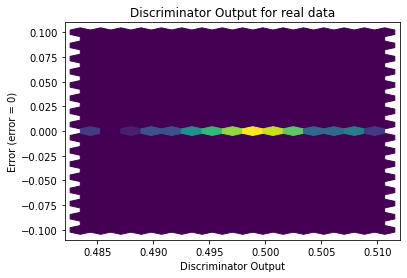

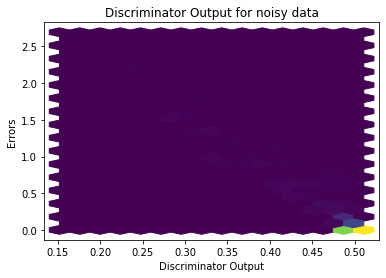

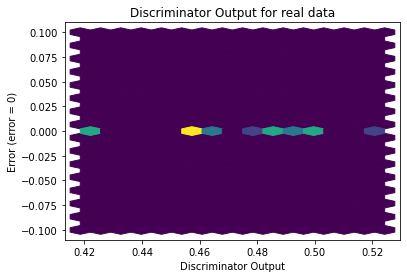

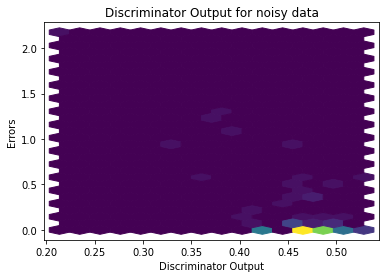

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6803]], device='cuda:0', requires_grad=True)
